In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.calibration import CalibratedClassifierCV

# Importando os dados

In [2]:
df = pd.read_csv('dados_jogos.csv')
df = df[df['season']>2010]
df.head()

,season,date_game,team_1,team_2,team_1_mp,team_1_fg,team_1_fga,team_1_fg_pct,team_1_fg3,team_1_fg3a,...,team_2_trb_pct,team_2_ast_pct,team_2_stl_pct,team_2_blk_pct,team_2_tov_pct,team_2_usg_pct,team_2_off_rtg,team_2_def_rtg,team_2_ws,game_result
8569,2011,"Tue, Oct 26, 2010",BOS,MIA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8570,2011,"Fri, Oct 29, 2010",BOS,NYK,240.0,34.0,72.0,0.472,3.0,12.0,...,52.1,31.6,4.1,11.9,14.4,100.0,100.6,95.5,W 1,W
8571,2011,"Wed, Nov 3, 2010",BOS,MIL,240.0,42.0,81.0,0.519,7.0,21.0,...,50.6,59.3,4.7,7.1,17.0,100.0,89.5,106.0,L 1,W
8572,2011,"Fri, Nov 5, 2010",BOS,CHI,265.0,37.0,79.0,0.468,4.0,12.0,...,52.5,64.3,8.1,10.7,17.7,100.0,113.6,121.7,L 1,W
8573,2011,"Wed, Nov 17, 2010",BOS,WAS,265.0,45.0,78.0,0.577,7.0,12.0,...,56.6,62.2,9.8,6.7,15.3,100.0,118.4,102.1,W 1,W


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16683 entries, 8569 to 25251
Data columns (total 73 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   season                   16683 non-null  int64  
 1   date_game                16683 non-null  object 
 2   team_1                   16683 non-null  object 
 3   team_2                   16683 non-null  object 
 4   team_1_mp                16450 non-null  float64
 5   team_1_fg                16450 non-null  float64
 6   team_1_fga               16450 non-null  float64
 7   team_1_fg_pct            16450 non-null  float64
 8   team_1_fg3               16450 non-null  float64
 9   team_1_fg3a              16450 non-null  float64
 10  team_1_fg3_pct           16450 non-null  float64
 11  team_1_ft                16450 non-null  float64
 12  team_1_fta               16450 non-null  float64
 13  team_1_ft_pct            16449 non-null  float64
 14  team_1_orb              

In [4]:
df.columns

Index(['season', 'date_game', 'team_1', 'team_2', 'team_1_mp', 'team_1_fg',
       'team_1_fga', 'team_1_fg_pct', 'team_1_fg3', 'team_1_fg3a',
       'team_1_fg3_pct', 'team_1_ft', 'team_1_fta', 'team_1_ft_pct',
       'team_1_orb', 'team_1_drb', 'team_1_trb', 'team_1_ast', 'team_1_stl',
       'team_1_blk', 'team_1_tov', 'team_1_pf', 'team_1_pts', 'team_1_ts_pct',
       'team_1_efg_pct', 'team_1_fg3a_per_fga_pct', 'team_1_fta_per_fga_pct',
       'team_1_orb_pct', 'team_1_drb_pct', 'team_1_trb_pct', 'team_1_ast_pct',
       'team_1_stl_pct', 'team_1_blk_pct', 'team_1_tov_pct', 'team_1_usg_pct',
       'team_1_off_rtg', 'team_1_def_rtg', 'team_1_ws', 'team_2_mp',
       'team_2_fg', 'team_2_fga', 'team_2_fg_pct', 'team_2_fg3', 'team_2_fg3a',
       'team_2_fg3_pct', 'team_2_ft', 'team_2_fta', 'team_2_ft_pct',
       'team_2_orb', 'team_2_drb', 'team_2_trb', 'team_2_ast', 'team_2_stl',
       'team_2_blk', 'team_2_tov', 'team_2_pf', 'team_2_pts', 'team_2_ts_pct',
       'team_2_efg_pct

In [6]:
df.dropna(subset=['team_1_mp', 'team_1_fg',
       'team_1_fga', 'team_1_fg_pct', 'team_1_fg3', 'team_1_fg3a',
       'team_1_fg3_pct', 'team_1_ft', 'team_1_fta', 'team_1_ft_pct',
       'team_1_orb', 'team_1_drb', 'team_1_trb', 'team_1_ast', 'team_1_stl',
       'team_1_blk', 'team_1_tov', 'team_1_pf', 'team_1_pts', 'team_1_ts_pct',
       'team_1_efg_pct', 'team_1_fg3a_per_fga_pct', 'team_1_fta_per_fga_pct',
       'team_1_orb_pct', 'team_1_drb_pct', 'team_1_trb_pct', 'team_1_ast_pct',
       'team_1_stl_pct', 'team_1_blk_pct', 'team_1_tov_pct', 'team_1_usg_pct',
       'team_1_off_rtg', 'team_1_def_rtg', 'team_1_ws','team_2_mp',
       'team_2_fg', 'team_2_fga', 'team_2_fg_pct', 'team_2_fg3', 'team_2_fg3a',
       'team_2_fg3_pct', 'team_2_ft', 'team_2_fta', 'team_2_ft_pct',
       'team_2_orb', 'team_2_drb', 'team_2_trb', 'team_2_ast', 'team_2_stl',
       'team_2_blk', 'team_2_tov', 'team_2_pf', 'team_2_pts', 'team_2_ts_pct',
       'team_2_efg_pct', 'team_2_fg3a_per_fga_pct', 'team_2_fta_per_fga_pct',
       'team_2_orb_pct', 'team_2_drb_pct', 'team_2_trb_pct', 'team_2_ast_pct',
       'team_2_stl_pct', 'team_2_blk_pct', 'team_2_tov_pct', 'team_2_usg_pct',
       'team_2_off_rtg', 'team_2_def_rtg', 'team_2_ws'], inplace = True )

In [7]:
df['team_2_ws'] = df['team_2_ws'].apply(lambda x: int(x[1:].strip()) if x[0]=='W' else -int(x[1:].strip()))

In [8]:
df['team_1_ws'] = df['team_1_ws'].apply(lambda x: int(x[1:].strip()) if x[0]=='W' else -int(x[1:].strip()))

In [14]:
df['game_result'] = df['game_result'].apply(lambda x: 1 if x.strip()=='W' else 0)

In [21]:
X = df[['team_1_mp', 'team_1_fg',
       'team_1_fga', 'team_1_fg_pct', 'team_1_fg3', 'team_1_fg3a',
       'team_1_fg3_pct', 'team_1_ft', 'team_1_fta', 'team_1_ft_pct',
       'team_1_orb', 'team_1_drb', 'team_1_trb', 'team_1_ast', 'team_1_stl',
       'team_1_blk', 'team_1_tov', 'team_1_pf', 'team_1_pts', 'team_1_ts_pct',
       'team_1_efg_pct', 'team_1_fg3a_per_fga_pct', 'team_1_fta_per_fga_pct',
       'team_1_orb_pct', 'team_1_drb_pct', 'team_1_trb_pct', 'team_1_ast_pct',
       'team_1_stl_pct', 'team_1_blk_pct', 'team_1_tov_pct', 'team_1_usg_pct',
       'team_1_off_rtg', 'team_1_def_rtg', 'team_1_ws','team_2_mp',
       'team_2_fg', 'team_2_fga', 'team_2_fg_pct', 'team_2_fg3', 'team_2_fg3a',
       'team_2_fg3_pct', 'team_2_ft', 'team_2_fta', 'team_2_ft_pct',
       'team_2_orb', 'team_2_drb', 'team_2_trb', 'team_2_ast', 'team_2_stl',
       'team_2_blk', 'team_2_tov', 'team_2_pf', 'team_2_pts', 'team_2_ts_pct',
       'team_2_efg_pct', 'team_2_fg3a_per_fga_pct', 'team_2_fta_per_fga_pct',
       'team_2_orb_pct', 'team_2_drb_pct', 'team_2_trb_pct', 'team_2_ast_pct',
       'team_2_stl_pct', 'team_2_blk_pct', 'team_2_tov_pct', 'team_2_usg_pct',
       'team_2_off_rtg', 'team_2_def_rtg', 'team_2_ws']]

y = df['game_result']

# Separando os dados em treinamento e teste

In [22]:
# Separando em validação e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)

In [23]:
scaler = MinMaxScaler()
X_train_norma =  pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Usando o RandomizedSearchCV para a seleção de hiperparametros

## XGBClassifier

In [94]:
# Instanciando o modelo XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', objective='binary:logistic', random_state=42)

# Definindo o grid de hiperparâmetros
param_grid = {
    'n_estimators': [100, 150,200, 250,300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'tree_method':['hist', 'approx', 'exact'],
}

# Configurando o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter= 150,  # Número de combinações aleatórias para testar
    scoring='accuracy',  # Métrica para avaliar os modelos
    n_jobs=10,  # Utiliza todos os processadores disponíveis
    cv=10,  # Validação cruzada
    verbose=2,
    random_state=42
)

# Ajustando o modelo aos dados
random_search.fit(X_train_norma, y_train)

# Exibindo os melhores hiperparâmetros encontrados
print(f"Melhores hiperparâmetros: {random_search.best_params_}")
print(f"Melhor acurácia: {random_search.best_score_}")

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
[CV] END ....................C=1, max_iter=400, penalty=none; total time=   0.0s
[CV] END ....................C=1, max_iter=400, penalty=none; total time=   0.0s
[CV] END ....................C=1, max_iter=400, penalty=none; total time=   0.0s
[CV] END ....................C=1, max_iter=400, penalty=none; total time=   0.0s
[CV] END ....................C=1, max_iter=400, penalty=none; total time=   0.0s
[CV] END ....................C=1, max_iter=400, penalty=none; total time=   0.0s
[CV] END ....................C=1, max_iter=400, penalty=none; total time=   0.0s
[CV] END ....................C=1, max_iter=400, penalty=none; total time=   0.0s
[CV] END ......................C=5, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ......................C=5, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ......................C=5, max_iter=500, penalty=l1; total time=   0.0s
[CV] END ......................C=5, max_iter

## RandomForestClassifier

In [68]:
model_forest = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': list(range(10,301,10)),
    'max_depth': [4, 6, 8, 10, 12, 14, 16, 18, None],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Executar a busca em grade
# Configurando o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_forest,
    param_distributions=param_grid,
    n_iter= 150,  # Número de combinações aleatórias para testar
    scoring='accuracy',  # Métrica para avaliar os modelos
    n_jobs=10,  # Utiliza todos os processadores disponíveis
    cv=10,  # Validação cruzada
    verbose=2,
    random_state=42
)

# Ajustando o modelo aos dados
random_search.fit(X_train_norma, y_train)

# Exibindo os melhores hiperparâmetros encontrados
print(f"Melhores hiperparâmetros: {random_search.best_params_}")
print(f"Melhor acurácia: {random_search.best_score_}")

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
[CV] END ..criterion=entropy, max_depth=12, n_estimators=120; total time=   3.9s
[CV] END .....criterion=gini, max_depth=16, n_estimators=130; total time=   5.1s
[CV] END .....criterion=gini, max_depth=10, n_estimators=190; total time=   5.0s
[CV] END .....criterion=gini, max_depth=18, n_estimators=100; total time=   4.6s
[CV] END ..criterion=entropy, max_depth=18, n_estimators=160; total time=   8.0s
[CV] END ....criterion=entropy, max_depth=6, n_estimators=90; total time=   1.7s
[CV] END ......criterion=gini, max_depth=10, n_estimators=90; total time=   2.6s
[CV] END ..criterion=entropy, max_depth=10, n_estimators=110; total time=   3.1s
[CV] END ......criterion=gini, max_depth=10, n_estimators=40; total time=   1.2s
[CV] END ...criterion=entropy, max_depth=8, n_estimators=150; total time=   3.6s
[CV] END ...criterion=entropy, max_depth=6, n_estimators=100; total time=   1.7s
[CV] END ......criterion=gini, max_depth=12,

## LogisticRegression

In [90]:
model_logistic = LogisticRegression()

param_grid = {
    'C': [ 0.25, 0.5, 0.75, 1, 1.5, 3, 5 , 7, 10, 12 ,15, 17, 20],
    'penalty': ['l1', 'l2', 'none'],  
    'max_iter': [200, 300, 400, 500]
}


# Executar a busca em grade
# Configurando o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_logistic,
    param_distributions=param_grid,
    n_iter= 150,  # Número de combinações aleatórias para testar
    scoring='accuracy',  # Métrica para avaliar os modelos
    n_jobs=10,  # Utiliza todos os processadores disponíveis
    cv=10,  # Validação cruzada
    verbose=2,
    random_state=42
)

# Ajustando o modelo aos dados
random_search.fit(X_train_norma, y_train)

# Exibindo os melhores hiperparâmetros encontrados
print(f"Melhores hiperparâmetros: {random_search.best_params_}")
print(f"Melhor acurácia: {random_search.best_score_}")

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
[CV] END ......................C=7, max_iter=200, penalty=l2; total time=   0.4s
[CV] END ......................C=7, max_iter=200, penalty=l2; total time=   0.4s
[CV] END ......................C=7, max_iter=200, penalty=l2; total time=   0.5s
[CV] END ......................C=7, max_iter=200, penalty=l2; total time=   0.3s
[CV] END ......................C=7, max_iter=200, penalty=l2; total time=   0.3s
[CV] END ......................C=7, max_iter=200, penalty=l2; total time=   0.3s
[CV] END ......................C=7, max_iter=200, penalty=l2; total time=   0.4s
[CV] END ......................C=7, max_iter=200, penalty=l2; total time=   0.3s
[CV] END .....................C=12, max_iter=400, penalty=l2; total time=   0.2s
[CV] END .....................C=12, max_iter=400, penalty=l2; total time=   0.4s
[CV] END .....................C=12, max_iter=500, penalty=l2; total time=   0.3s
[CV] END ...................C=15, max_iter=2

/home/thiago/lsbd/steel_2024/venv-steel/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
990 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
510 fits failed with the following error:
Traceback (most recent call last):
  File "/home/thiago/lsbd/steel_2024/venv-steel/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/thiago/lsbd/steel_2024/venv-steel/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/thiago/lsbd/steel_2024/

## SGDClassifier

In [87]:
model_sgdc = SGDClassifier(random_state=42)

# Definindo o grid de hiperparâmetros
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet'],  # Tipos de regularização
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Força da regularização
    'max_iter': [1000, 2000, 3000],  # Número máximo de iterações
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],  # Estratégias de ajuste da taxa de aprendizado
    'eta0': [0.01, 0.1, 1.0]  # Taxa de aprendizado inicial
}

# Executar a busca em grade
# Configurando o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_sgdc,
    param_distributions=param_grid,
    n_iter= 150,  # Número de combinações aleatórias para testar
    scoring='accuracy',  # Métrica para avaliar os modelos
    n_jobs=10,  # Utiliza todos os processadores disponíveis
    cv=10,  # Validação cruzada
    verbose=2,
    random_state=42
)

# Ajustando o modelo aos dados
random_search.fit(X_train_norma, y_train)

# Exibindo os melhores hiperparâmetros encontrados
print(f"Melhores hiperparâmetros: {random_search.best_params_}")
print(f"Melhor acurácia: {random_search.best_score_}")

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
[CV] END ......................C=5, max_iter=500, penalty=l2; total time=   0.3s
[CV] END ....................C=5, max_iter=500, penalty=none; total time=   0.0s
[CV] END ....................C=5, max_iter=500, penalty=none; total time=   0.0s
[CV] END .....................C=10, max_iter=300, penalty=l2; total time=   0.3s
[CV] END .....................C=10, max_iter=300, penalty=l2; total time=   0.4s
[CV] END .....................C=10, max_iter=300, penalty=l2; total time=   0.4s
[CV] END .....................C=10, max_iter=400, penalty=l2; total time=   0.3s
[CV] END ...................C=10, max_iter=400, penalty=none; total time=   0.0s
[CV] END ...................C=10, max_iter=400, penalty=none; total time=   0.0s
[CV] END ...................C=10, max_iter=400, penalty=none; total time=   0.0s
[CV] END ...................C=10, max_iter=400, penalty=none; total time=   0.0s
[CV] END ...................C=10, max_iter=4

/home/thiago/lsbd/steel_2024/venv-steel/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[CV] END alpha=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, penalty=l2; total time=   0.1s
[CV] END alpha=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, penalty=elasticnet; total time=   0.2s
[CV] END alpha=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, penalty=elasticnet; total time=   0.3s
[CV] END alpha=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, penalty=l2; total time=   0.1s
[CV] END alpha=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, penalty=l2; total time=   0.1s
[CV] END alpha=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END alpha=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, penalty=l2; total time=   0.2s
[CV] END alpha=0.001, eta0=1.0, learning_rate=invscaling, max_iter=2000, penalty=elasticnet; total time=   0.1s
[CV] END alpha=0.001, eta0=1.0, learning_rate=invscaling, max_iter=2000, penalty=elasticnet; total time=   0.1s
[CV] END alpha=0.1, eta0=0.1, learning_r

# Treinamento

In [95]:
xgb_model = XGBClassifier(eval_metric='logloss', objective='binary:logistic', random_state=42, tree_method = 'approx', subsample = 0.6, 
reg_lambda = 1.5, reg_alpha = 0.1, n_estimators = 300, max_depth = 5, learning_rate = 0.01, gamma = 0.1, colsample_bytree = 1.0)

xgb_model.fit(X_train_norma, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [88]:
# RandomForestClassifier

model_forest = RandomForestClassifier(random_state=42, n_estimators = 220, max_depth = 18, criterion = 'entropy')

model_forest.fit(X_train_norma, y_train)

RandomForestClassifier(criterion='entropy', max_depth=18, n_estimators=220,
                       random_state=42)

In [93]:
# LogisticRegression
model_logistic = LogisticRegression(penalty = 'l2', max_iter = 400, C = 0.5)
model_logistic.fit(X_train_norma, y_train)

LogisticRegression(C=0.5, max_iter=400)

In [96]:
model_sgdc = SGDClassifier(random_state=42, penalty = 'l1', max_iter = 1000, learning_rate = 'optimal', eta0 = 1.0, alpha = 0.0001)
model_sgdc.fit(X_train_norma, y_train)

SGDClassifier(eta0=1.0, penalty='l1', random_state=42)

# Avaliação

In [97]:
X_test_norma =  pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

## XGBClassifier

In [127]:
y_pred_xgb = xgb_model.predict(X_test_norma)

print("Acurácia:", accuracy_score(y_test, y_pred_xgb))
print("Revocação:", recall_score(y_test, y_pred_xgb))
print("Precisão:", precision_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb))

Acurácia: 0.5922772879294619
Revocação: 0.827349524815206
Precisão: 0.6071290197597831
F1-score: 0.7003351955307262


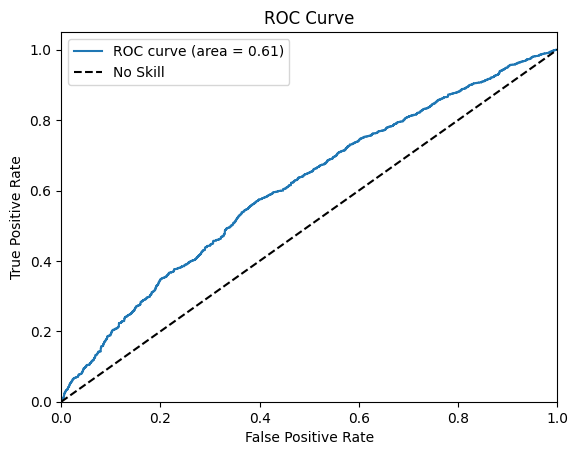

In [105]:
y_pred_proba = xgb_model.predict_proba(X_test_norma)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

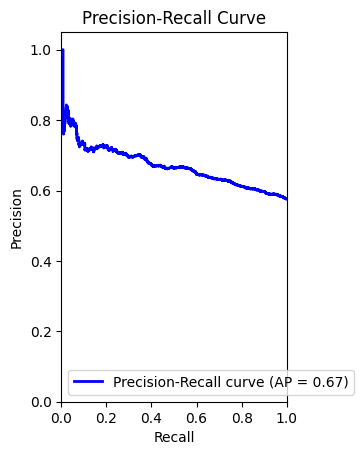

In [107]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.show()

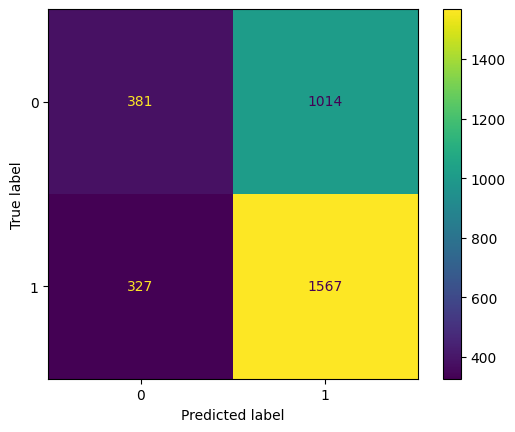

In [131]:
cm = confusion_matrix(y_test, y_pred_xgb)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show() 

In [142]:
feature_names = X_train.columns

importances = xgb_model.feature_importances_

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [143]:
feature_importances.iloc[:10]

,Feature,Importance
33,team_1_ws,0.043041
67,team_2_ws,0.032461
0,team_1_mp,0.019036
53,team_2_ts_pct,0.017644
31,team_1_off_rtg,0.017399
55,team_2_fg3a_per_fga_pct,0.017278
65,team_2_off_rtg,0.017157
54,team_2_efg_pct,0.016888
32,team_1_def_rtg,0.016457
16,team_1_tov,0.016433


In [144]:
feature_importances.iloc[-10:]

,Feature,Importance
17,team_1_pf,0.013155
42,team_2_fta,0.013042
8,team_1_fta,0.012832
7,team_1_ft,0.012060
4,team_1_fg3,0.011839
46,team_2_trb,0.011743
10,team_1_orb,0.011368
48,team_2_stl,0.009900
30,team_1_usg_pct,0.000000
64,team_2_usg_pct,0.000000


## RandomForestClassifier

In [111]:
y_pred_forest = model_forest.predict(X_test_norma)

print("Acurácia:", accuracy_score(y_test, y_pred_forest))
print("Revocação:", recall_score(y_test, y_pred_forest))
print("Precisão:", precision_score(y_test, y_pred_forest))
print("F1-score:", f1_score(y_test, y_pred_forest))

Acurácia: 0.5831559744603223
Revocação: 0.8247096092925026
Precisão: 0.6005382545174933
F1-score: 0.6949944382647386


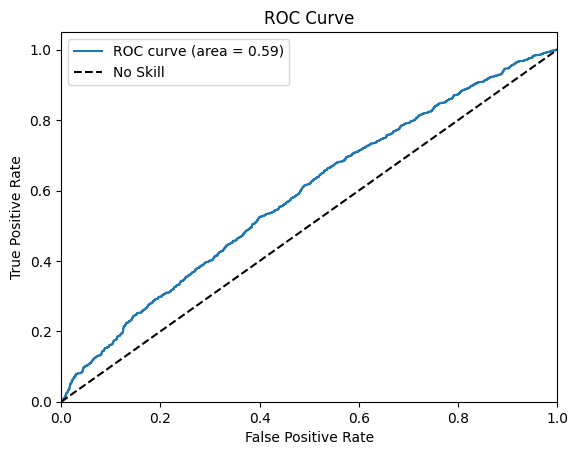

In [112]:
y_pred_proba = model_forest.predict_proba(X_test_norma)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

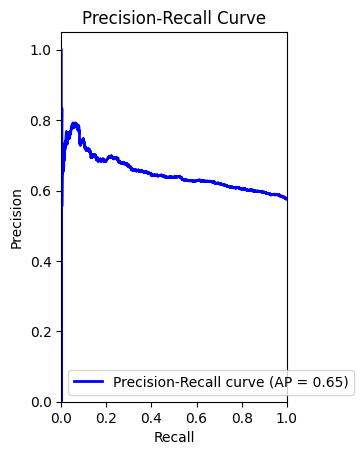

In [113]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.show()

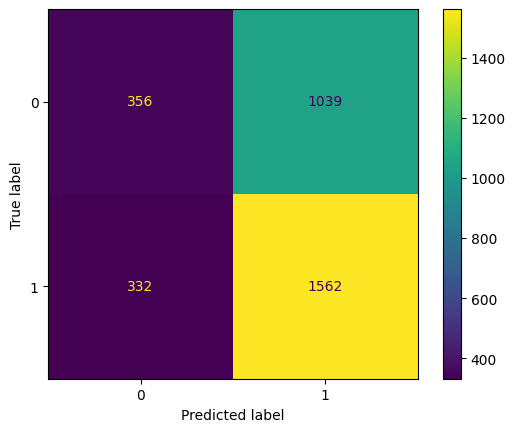

In [132]:
cm = confusion_matrix(y_test, y_pred_forest)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show() 

## LogisticRegression

In [121]:
y_pred_logistic = model_logistic.predict(X_test_norma)

print("Acurácia:", accuracy_score(y_test, y_pred_logistic))
print("Revocação:", recall_score(y_test, y_pred_logistic))
print("Precisão:", precision_score(y_test, y_pred_logistic))
print("F1-score:", f1_score(y_test, y_pred_logistic))

Acurácia: 0.5974460322286409
Revocação: 0.7412882787750792
Precisão: 0.6273458445040214
F1-score: 0.6795740561471443


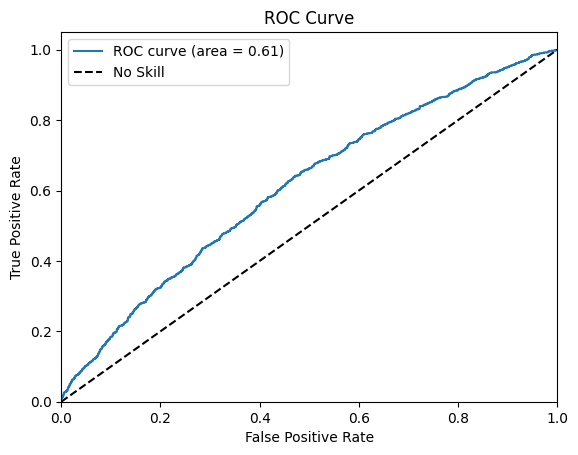

In [124]:
y_pred_proba = model_logistic.predict_proba(X_test_norma)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

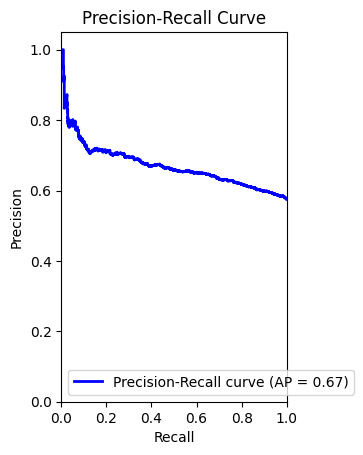

In [123]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.show()

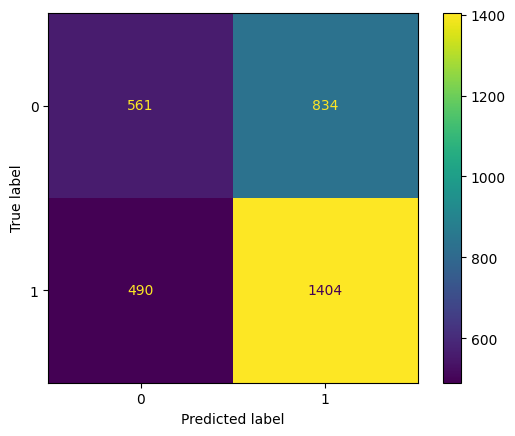

In [133]:
cm = confusion_matrix(y_test, y_pred_logistic)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show() 

## SGDClassifier

In [134]:
y_pred_sgdc = model_sgdc.predict(X_test_norma)

print("Acurácia:", accuracy_score(y_test, y_pred_sgdc))
print("Revocação:", recall_score(y_test, y_pred_sgdc))
print("Precisão:", precision_score(y_test, y_pred_sgdc))
print("F1-score:", f1_score(y_test, y_pred_sgdc))

Acurácia: 0.5953177257525084
Revocação: 0.7265047518479408
Precisão: 0.6285975331201462
F1-score: 0.6740142052412442


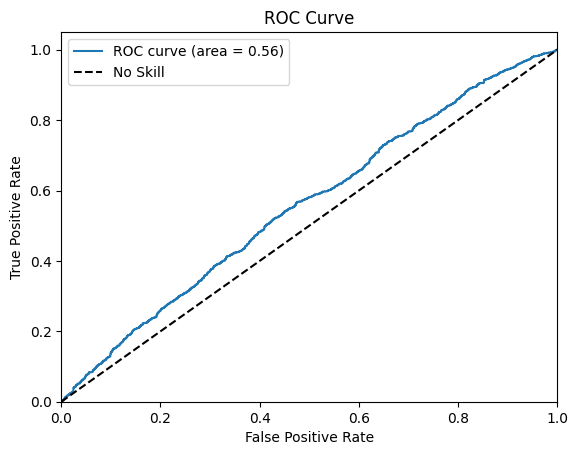

In [137]:
svm2 = SGDClassifier(random_state=42, penalty = 'l1', max_iter = 1000, learning_rate = 'optimal', eta0 = 1.0, alpha = 0.0001)
clf = CalibratedClassifierCV(svm2) 
clf.fit(X_train, y_train)
y_pred_proba = clf.predict_proba(X_test_norma)[:,1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

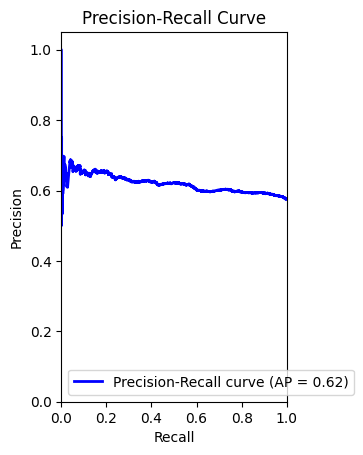

In [138]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.show()

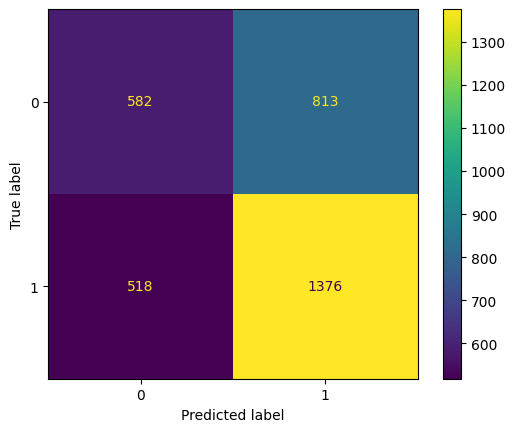

In [139]:
cm = confusion_matrix(y_test, y_pred_sgdc)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show() 